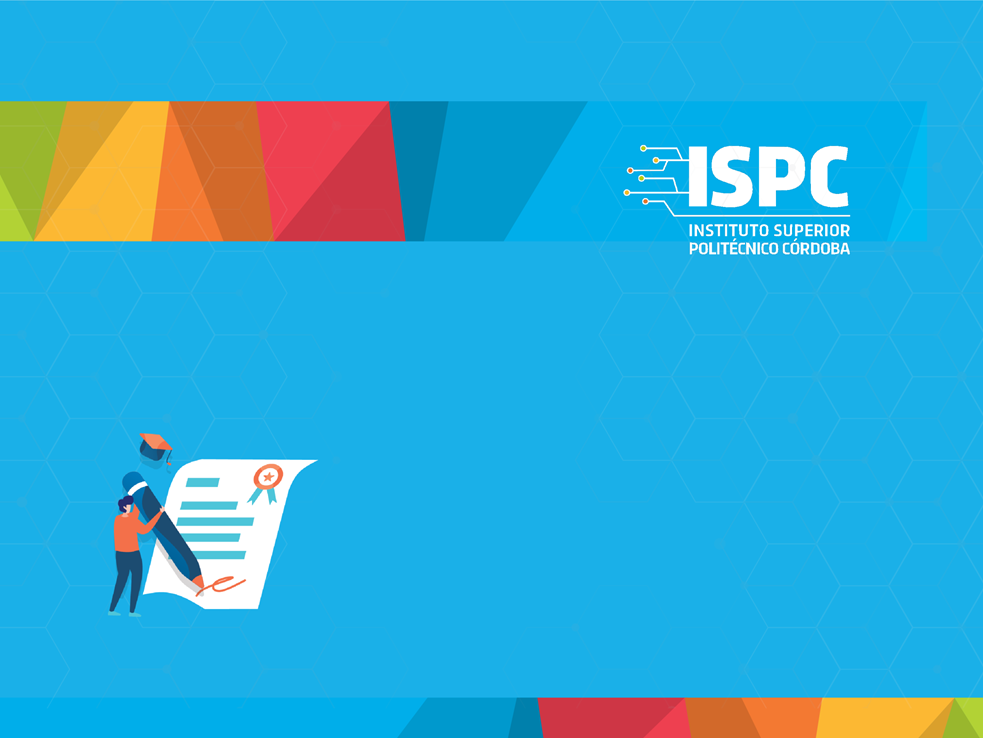

<a href="https://colab.research.google.com/github/joanby/python-ml-course/blob/master/notebooks/T10%20-%201%20-%20Analisis%20de%20Componentes%20Principales-Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Consignas:
# Analizar y resolver
# # Subir a repositorio de Github, con al menos un pull request, y devolver el link

# Hacer un fork de este repositorio y trabajar sobre ese archivo


1- Generar un set de datos, con al menos 4 predictores

2- Dado el siguiente código indicar que tipo de problema instanta resolver. 

3- Evaluar los resultados.

4- Agregar otro algoritmo para resolver sobre el mismo set de datos.


In [40]:
# pip install graphviz

# Para generar los datos usaremos las funciones provistas en sklearn

sklearn.datasets: Datasets


In [41]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split

from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score

from mlxtend.plotting import plot_decision_regions

In [42]:
datos = datasets.load_iris()

X = datos.data[:, [0, 2]]
Y = datos.target

X_rf = X
Y_rf = Y

datos = pd.DataFrame(data = np.c_[datos['data'],
                     datos['target']],
                     columns = datos['feature_names'] + ['target'])

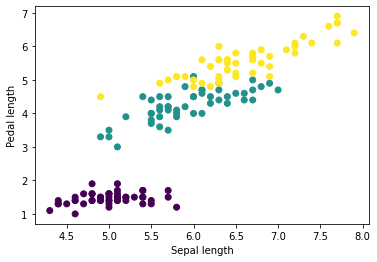

In [43]:
c = datos['target']
plt.scatter( datos['sepal length (cm)'], 
             datos['petal length (cm)'], 
             c = c )
plt.xlabel('Sepal length')
plt.ylabel('Pedal length')
plt.show()

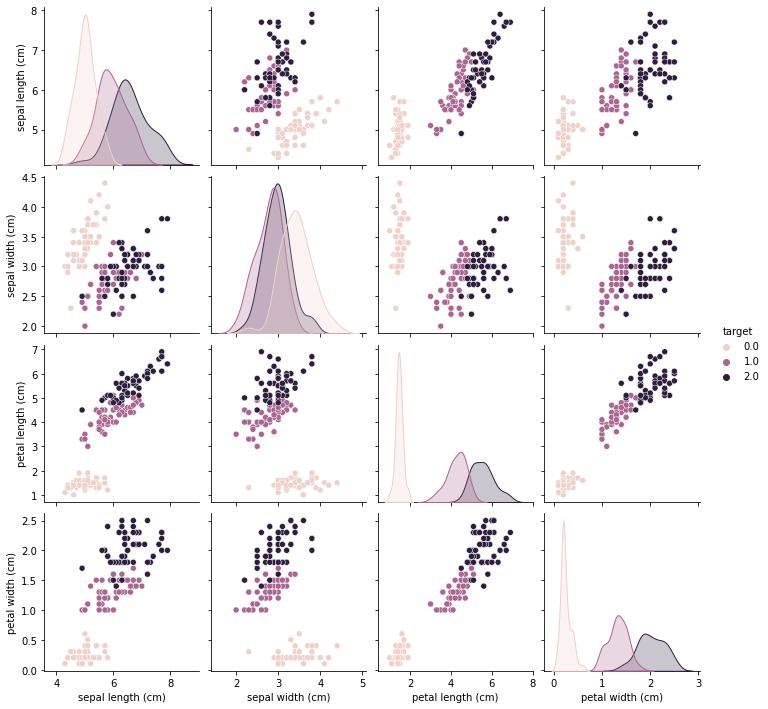

In [44]:
sns.pairplot(datos, hue = 'target');

In [45]:
X_train , X_test , y_train, y_test = train_test_split(X, 
                                                      Y, 
                                                      test_size = 0.2,
                                                      random_state = 0)
modelo = svm.SVC(kernel='linear',
                 C = 1)
modelo.fit(X_train,y_train)

SVC(C=1, kernel='linear')

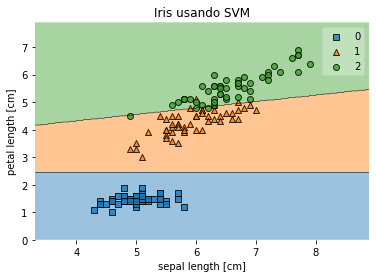

In [46]:
plot_decision_regions(X, 
                      Y, 
                      clf = modelo, 
                      legend = 1)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.title('Iris usando SVM')
plt.show()

In [47]:
# Datos
# ==============================================================================

#PONER CODIGO AQUI

In [48]:
# Accuracy de test del modelo 
# ==============================================================================
pred = modelo.predict(X_test)
print(confusion_matrix(y_test, pred))
accuracies = cross_val_score(estimator = modelo, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Desviacion estandar: {:.2f} %".format(accuracies.std()*100))

print(classification_report(y_test,pred))
print("Score: {:.2f} %".format(modelo.score(X_test,y_test)))


[[11  0  0]
 [ 0 13  0]
 [ 0  1  5]]
Accuracy: 94.17 %
Desviacion estandar: 5.34 %
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.93      1.00      0.96        13
           2       1.00      0.83      0.91         6

    accuracy                           0.97        30
   macro avg       0.98      0.94      0.96        30
weighted avg       0.97      0.97      0.97        30

Score: 0.97 %


Segundo algoritmo

In [49]:
from sklearn.datasets import load_iris
from sklearn.tree import (
    DecisionTreeClassifier,
    DecisionTreeRegressor,
    plot_tree,
    export_graphviz,
)
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import graphviz

In [50]:
X = X_rf
Y = Y_rf
print(f"x_train: {X.shape}")
print(f"y_train: {Y.shape}")

x_train: (150, 2)
y_train: (150,)


In [51]:
# Train a DT on the simplified dataset
dt_model = DecisionTreeClassifier(max_depth=2, 
                                 random_state=42)
dt_model.fit(X, Y)

# Compute accuracy on training set
acc = dt_model.score(X, Y)
print(f"Training accuracy: {acc:.5f}")

Training accuracy: 0.95333


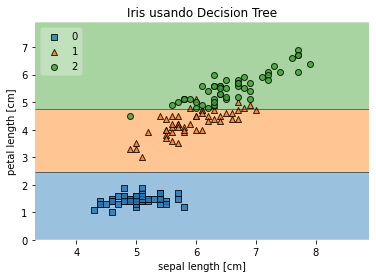

In [52]:
plot_decision_regions(X=X, 
                      y=Y,
                      clf = dt_model,
                      legend=2)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.title('Iris usando Decision Tree')
plt.show()